In [477]:
# Dataset
# u.data - 100000 ratings by 943 users on 1682 items - user id | item id | rating | timestamp 
# u.item - Information about the items (movies) - movie id | movie title | release date | video release date |
        # IMDb URL | unknown | Action | Adventure | Animation |Children's | Comedy | Crime | Documentary | Drama | Fantasy |
        # Film-Noir | Horror | Musical | Mystery | Romance | Sci-Fi |Thriller | War | Western |
# u.genre - A list of the genres.
# u.user  - Demographic information about the users - user id | age | gender | occupation | zip code
# u.occupation - A list of the occupations

In [478]:
import pandas as pd;
import numpy as np;
import matplotlib.pyplot as plt
%matplotlib inline

In [479]:
#ignore python warning
import warnings
warnings.filterwarnings('ignore')

In [480]:
#*****************Create panda data frame for u.data*************#

In [481]:
rating_data = pd.read_csv('../u.data', delim_whitespace=True, header=None)
rating_data.columns = ["user_id", "movie_id", "ratings", "timestamp"]
print(rating_data.shape)

(100000, 4)


In [482]:
np.unique(rating_data['ratings'])

array([1, 2, 3, 4, 5])

In [483]:
#*****************Create panda data frame for u.user*************#

In [484]:
user_data=pd.read_csv('../u.user',sep='|',header=None)
user_data.columns=['user_id','age','gender','occupation','zip_code']
print(user_data.shape)

(943, 5)


In [485]:
#*****************Merge u.data and u.user and create a new data frame*************#

In [486]:
user_ratings_data=pd.merge(user_data,rating_data,on='user_id')
user_ratings_data.shape

(100000, 8)

In [487]:
user_ratings_data.head()

,user_id,age,gender,occupation,zip_code,movie_id,ratings,timestamp
0,1,24,M,technician,85711,61,4,878542420
1,1,24,M,technician,85711,189,3,888732928
2,1,24,M,technician,85711,33,4,878542699
3,1,24,M,technician,85711,160,4,875072547
4,1,24,M,technician,85711,20,4,887431883


In [488]:
#*****************Converting categorical values to numerical for user_ratings_data*************#

In [489]:
# Converting categorical values to numerical
#user_ratings_date['ratings']=user_ratings_date['ratings'].map(lambda x: 1 if x>2 else 0)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
user_ratings_data['gender'] = le.fit_transform(user_ratings_data['gender'])
user_ratings_data['occupation'] = le.fit_transform(user_ratings_data['occupation'])
user_ratings_data.head()

,user_id,age,gender,occupation,zip_code,movie_id,ratings,timestamp
0,1,24,1,19,85711,61,4,878542420
1,1,24,1,19,85711,189,3,888732928
2,1,24,1,19,85711,33,4,878542699
3,1,24,1,19,85711,160,4,875072547
4,1,24,1,19,85711,20,4,887431883


In [490]:
np.unique(user_ratings_data['age'])

array([ 7, 10, 11, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,
       44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60,
       61, 62, 63, 64, 65, 66, 68, 69, 70, 73])

In [491]:
#*****************Checking if there is any Linear Relationship between age and ratings*************#

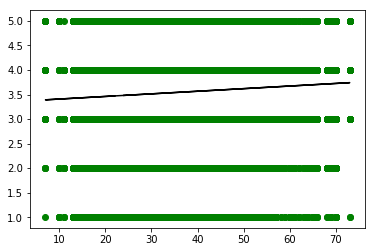

In [492]:
from sklearn import linear_model
from matplotlib import pyplot as plt
linear_reg = linear_model.LinearRegression() 
age_data=pd.DataFrame(user_ratings_data['age'])
ratings_data=user_ratings_data['ratings']
ratings_data.head()
linear_reg.fit(age_data, ratings_data)
plt.scatter(age_data, ratings_data,color='g')
plt.plot(age_data, linear_reg.predict(age_data),color='k')
plt.show()

In [493]:
#*******************MODELS FOR PREDICTING USER RATING using user_ratings_data**********************#

In [494]:
#*****************DecisionTree Classification to predict rating*************#

In [495]:
from sklearn.tree import DecisionTreeClassifier
import numpy as np
from sklearn.preprocessing import LabelEncoder
X=user_ratings_data[['age','gender','occupation']].values;
y=user_ratings_data[['ratings']].values;
dtree_model = DecisionTreeClassifier(max_depth = 5).fit(X, y)
dtree_predictions = dtree_model.predict(X)

In [496]:
np.unique(dtree_predictions)

array([1, 3, 4, 5])

In [497]:
accuracy = dtree_model.score(X, y)
print(accuracy)

0.35203


In [498]:
# Naive bayes Classification to predict rating
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB().fit(X, y.ravel())
gnb_predictions = gnb.predict(X)

In [499]:
np.unique(gnb_predictions)

array([4])

In [500]:
# accuracy on X_test
accuracy = gnb.score(X, y)
print(accuracy)

0.34174


In [501]:
#*******************ADDING MOVIE DATA**********************#

In [502]:
#*************************CURATING u.item data************************#

In [503]:
#************ Creating panda dataframe for u.item *********************#

In [504]:
movie_data=pd.read_csv('../u.item',sep='|',header=None,encoding='latin-1')
#movie_data=movie_data.iloc[:,0:6]
movie_data.columns=['movie_id','movie_title','release_date','video_release_date','imdb_url','unknown','Action','Adventure','Animation','Children','Comedy','Crime','Documentary','Drama','Fantasy','Film-Noir','Horror','Musical','Mystery','Romance','Sci-Fi','Thriller','War','Western']
movie_data.head()

,movie_id,movie_title,release_date,video_release_date,imdb_url,unknown,Action,Adventure,Animation,Children,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [505]:
#**********function to bucket movie years, create new feature movie decade*********************#

In [506]:
def movie_bucket(year):
    year=int(year);
    if (year<1970):
      return 1960;
    elif (year>=1970 and year<=1980):
      return 1980;
    elif (year>=1980 and year<=1990):
      return 1990;
    elif (year>=1990 and year<=2000):
      return 2000;
    elif (year>=2000 and year<=2010):
      return 2010;
    elif (year>2010):
      return 2020

# validating the function
str1="01-Jan-2011"
print(movie_bucket(int(str1.split('-')[2])));

2020


In [507]:
#**********Adding two new features movie_year and movie_decade to movie_data*********************#

In [508]:
movie_data.dropna(subset=["release_date"],inplace= True)
movie_data['movie_year']=movie_data['release_date'].str.split('-').str.get(2);
movie_data['movie_decade']=movie_data['movie_year'].apply(movie_bucket);

In [509]:
movie_data.shape

(1681, 26)

In [510]:
#**********DATA ENRICHMENT USING IMDB DATA*********************#

In [511]:
# Content Rating is not part of the data set , we need this in order to make sure we are recommending appropriate
# rated movies to the appropriate age group of users

In [512]:
#**********Getting content rating from IMDB*********************#

In [513]:
imdb_data=pd.read_csv('../imdb_content_rating.csv')
# If content_rating is missing , adding default values as R (MOST RESTRICTED)
imdb_data['content_rating'].fillna('R',inplace=True)
imdb_data[imdb_data['content_rating'].isnull()]

,movie_title,content_rating


In [514]:
imdb_data.shape

(5043, 2)

In [515]:
#**********Merging movie data set and IMDB data set*********************#

In [516]:
movie_data['movie_title']=movie_data['movie_title'].map(lambda x:x.split("(")[0].rstrip())
np.size(np.unique(movie_data['movie_title']))

1657

In [517]:
# merge u.item and imdb_cr to create a new data frame
movies_imdb_data=pd.merge(movie_data,imdb_data,on='movie_title',how='left')

In [518]:
np.size(np.unique(movies_imdb_data['movie_title']))

1657

In [519]:
#**********Merging user_ratings_data and movies_imdb_data********************#

In [520]:
# merge u.user, u.data, u.item and create a new data frame
user_movies_data=pd.merge(user_ratings_data,movies_imdb_data,on='movie_id',how='left')

In [521]:
user_movies_data['content_rating'].fillna("R",inplace=True)

In [522]:
np.unique(user_movies_data['content_rating'])

array(['Approved', 'G', 'GP', 'M', 'NC-17', 'Not Rated', 'PG', 'PG-13',
       'R', 'Unrated', 'X'], dtype=object)

In [523]:
np.unique(user_movies_data['ratings'])

array([1, 2, 3, 4, 5])

In [524]:
# Label encoding content_rating
user_movies_data['content_rating']=le.fit_transform(user_movies_data['content_rating'])

In [525]:
np.unique(user_movies_data['content_rating'])

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [526]:
np.unique(user_movies_data['ratings'])

array([1, 2, 3, 4, 5])

In [527]:
user_movies_data.dropna(subset=['movie_year'],inplace=True)
print(user_movies_data[user_movies_data['movie_year'].isna()]['movie_year'])

Series([], Name: movie_year, dtype: object)


In [528]:
#*******************MODELS FOR PREDICTING USER RATING using user_movies_data**********************#

In [529]:
#**************Creating Training and Testing Set********************************#

In [530]:
X=user_movies_data[['age','gender','occupation','movie_year','content_rating','unknown','Action','Adventure','Animation','Children','Comedy','Crime','Documentary','Drama','Fantasy','Film-Noir','Horror','Musical','Mystery','Romance','Sci-Fi','Thriller','War','Western']].values;
y=user_movies_data[['ratings']].values;

In [531]:
# Lets do an split for training and testing
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X, y,test_size = .3, random_state = 1)

In [532]:
#**************Naive Bayes********************************#

In [533]:
gnb = GaussianNB().fit(X_train, y_train)
gnb_predictions = gnb.predict(X_test)

In [534]:
np.unique(gnb_predictions)

array([1, 2, 3, 4, 5])

In [535]:
# accuracy on X_test
accuracy = gnb.score(X_test, y_test)
print(accuracy)

0.2954694897422409


In [536]:
#**************Logistics Regression********************************#

In [537]:
# Running LogisticRegression on new data
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train, y_train)
lr_predictions = logisticRegr.predict(X_test)

In [538]:
# accuracy
accuracy = logisticRegr.score(X_test, y_test)
print(accuracy)

0.34274723829563386


In [539]:
#**********************Binary Classification to Predict liked***************************#

In [540]:
# function to create a new feature liked based on user rating
# user rating > 3, user liked the movie
# user rating <= 3, user did not like the movie
def like_identification(rating):
        if(rating>3):
            liked=1
        else:
            liked=0  
        return liked;    
print(like_identification(4))  

1


In [541]:
# Apply like_identification to new data set
user_movies_data['liked']=user_movies_data['ratings'].map(lambda x: like_identification(x))
np.unique(user_movies_data['liked'])

array([0, 1])

In [542]:
y=user_movies_data[['liked']].values;
X_train,X_test,y_train,y_test=train_test_split(X, y,test_size = .3, random_state = 1)
X_train.shape

(70970, 24)

In [543]:
#**************Logistics Regression********************************#

In [544]:
# Running LogisticRegression to predict binary target
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()
y=user_movies_data[['liked']];
logisticRegr.fit(X_train, y_train)
lr_predictions = logisticRegr.predict(X_test)

In [545]:
# accuracy
accuracy = logisticRegr.score(X_test, y_test)
print(accuracy)

0.5826209889531825


In [546]:
print(logisticRegr.predict(user_movies_data[['age','gender','occupation','movie_year','content_rating','unknown','Action','Adventure','Animation','Children','Comedy','Crime','Documentary','Drama','Fantasy','Film-Noir','Horror','Musical','Mystery','Romance','Sci-Fi','Thriller','War','Western']].iloc[0:100]))

[1 1 0 1 1 1 0 0 1 0 1 1 1 1 1 0 1 1 1 0 0 1 1 1 0 1 1 0 1 0 1 0 1 0 0 1 0
 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 0 0 0 1 0 1 0 0 1 0 0 1 1 1 1 1 0 0 1
 1 1 1 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 1 1 0 1]


In [547]:
#**************Naive Bayes********************************#

In [548]:
# Running Naive beyes to predict binary target
gnb = GaussianNB().fit(X_train, y_train)
gnb_predictions = gnb.predict(X_test)

In [549]:
np.unique(gnb_predictions)

array([0, 1])

In [550]:
# accuracy on X_test
accuracy = gnb.score(X_test, y_test)
print(accuracy)

0.5691741188847975


In [551]:
# accuracy on X_train
accuracy = gnb.score(X_train, y_train)
print(accuracy)

0.5652670142313654


In [552]:
#***************Decision Tree**********************************#

In [553]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth = 5).fit(X_train, y_train)
dtree_pred = dtree.predict(X_test)

In [554]:
print(metrics.confusion_matrix(y_test,dtree_pred))

[[ 6088  7362]
 [ 4511 12455]]


In [555]:
print("Accuracy:",metrics.accuracy_score(y_test, dtree_pred))

Accuracy: 0.6096462388216728


In [556]:
#******************SVM***************************************#

In [557]:
# NOT COMPLETING , waited for more than 15 mins
#from sklearn.svm import SVC
#svc = SVC(kernel='linear') 
#svc.fit(X_train, y_train) 
#svc_pred=svc.predict(X_test)

In [558]:
#**************Random Forrest********************************#

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(max_depth=30, max_features="auto",random_state=0,n_estimators=120)
clf.fit(X,y)
y_pred=clf.predict(X_test)

In [ ]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

In [ ]:
print(metrics.classification_report(y_test,y_pred))

In [ ]:
#*******************FURTHER VALIDATION******************************#

In [ ]:
actual_values=np.reshape(user_movies_data[['liked']].iloc[0:50].values,50)

In [ ]:
predicted_values=clf.predict(user_movies_data[['age','gender','occupation','movie_year','content_rating','unknown','Action','Adventure','Animation','Children','Comedy','Crime','Documentary','Drama','Fantasy','Film-Noir','Horror','Musical','Mystery','Romance','Sci-Fi','Thriller','War','Western']].iloc[0:50])
print(predicted_values)

In [ ]:
print(metrics.confusion_matrix(actual_values,predicted_values))

In [ ]:
print("Accuracy:",metrics.accuracy_score(actual_values, predicted_values))

In [ ]:
#******************* USER ELIGIBILITY - Additional Validation******************************#

In [ ]:
def is_user_eligble(movie_rating,user_age):    
    if user_age <= 17 and movie_rating in ['2','4','8','9','10']: #['R','X','NC-17', 'Not Rated','unRated']
        return False;
    return True;        

In [ ]:
is_user_eligble('8',16)

In [ ]:
#************** PREDICTION *************************#

In [ ]:
def prediction_engine(user_predict,movie_predict):
    user_movie_predict=[]
    for row in movie_predict:
        if is_user_eligble(row[1],user_predict[0][1]):
            user_movie_predict.append(np.concatenate((user_predict, row), axis=None))     
    return clf.predict(user_movie_predict)        

In [ ]:
user_predict=user_movies_data[['age','gender','occupation']].iloc[:1].values
user_predict

In [ ]:
movie_predict=user_movies_data[['movie_year','content_rating','unknown','Action','Adventure','Animation','Children','Comedy','Crime','Documentary','Drama','Fantasy','Film-Noir','Horror','Musical','Mystery','Romance','Sci-Fi','Thriller','War','Western']].iloc[1:100].values
movie_predict

In [ ]:
predicted_values=prediction_engine(user_predict,movie_predict)

In [ ]:
for i in range(1,100):
    print(movie_data.at[i,'movie_title'],predicted_values[i-1])

In [ ]:
# CONCLUSION:
# The prediction engine will run for all users and make recommend movie
# they may like based on their prior likeness